In [1]:
import pandas as pd
import os
import numpy as np
import datetime as dt
import string
import csv

In [70]:
import seaborn as sns 
from matplotlib import pyplot as plt

In [50]:
from sklearn.model_selection import train_test_split

In [2]:
# loading data

In [13]:
cwd = os.getcwd()

In [15]:
sample1= pd.read_csv(cwd+'\data\ch_sample_selections_data.csv')

In [18]:
sample2=pd.read_csv(cwd+'\data\\forex_finance_finindependence_forex.csv')

In [19]:
sample3=pd.read_csv(cwd+'\data\sample_wsb_gme_personalfin_stock.csv')

In [20]:
sample1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   id                     15000 non-null  object 
 2   author                 15000 non-null  object 
 3   created                15000 non-null  object 
 4   retrieved              15000 non-null  object 
 5   edited                 15000 non-null  object 
 6   pinned                 15000 non-null  int64  
 7   archived               15000 non-null  int64  
 8   locked                 15000 non-null  int64  
 9   removed                15000 non-null  int64  
 10  deleted                15000 non-null  int64  
 11  is_self                15000 non-null  int64  
 12  is_video               15000 non-null  int64  
 13  is_original_content    15000 non-null  int64  
 14  title                  15000 non-null  object 
 15  li

In [21]:
sample2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             6104 non-null   int64  
 1   id                     6104 non-null   object 
 2   author                 6104 non-null   object 
 3   created                6104 non-null   object 
 4   retrieved              6104 non-null   object 
 5   edited                 6104 non-null   object 
 6   pinned                 6104 non-null   int64  
 7   archived               6104 non-null   int64  
 8   locked                 6104 non-null   int64  
 9   removed                6104 non-null   int64  
 10  deleted                6104 non-null   int64  
 11  is_self                6104 non-null   int64  
 12  is_video               6104 non-null   int64  
 13  is_original_content    6104 non-null   int64  
 14  title                  6104 non-null   object 
 15  link

In [22]:
sample3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             16000 non-null  int64  
 1   id                     16000 non-null  object 
 2   author                 16000 non-null  object 
 3   created                16000 non-null  object 
 4   retrieved              16000 non-null  object 
 5   edited                 16000 non-null  object 
 6   pinned                 16000 non-null  int64  
 7   archived               16000 non-null  int64  
 8   locked                 16000 non-null  int64  
 9   removed                16000 non-null  int64  
 10  deleted                16000 non-null  int64  
 11  is_self                16000 non-null  int64  
 12  is_video               16000 non-null  int64  
 13  is_original_content    16000 non-null  int64  
 14  title                  16000 non-null  object 
 15  li

In [24]:
data = pd.concat([sample1,sample2,sample3])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37104 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             37104 non-null  int64  
 1   id                     37104 non-null  object 
 2   author                 37104 non-null  object 
 3   created                37104 non-null  object 
 4   retrieved              37104 non-null  object 
 5   edited                 37104 non-null  object 
 6   pinned                 37104 non-null  int64  
 7   archived               37104 non-null  int64  
 8   locked                 37104 non-null  int64  
 9   removed                37104 non-null  int64  
 10  deleted                37104 non-null  int64  
 11  is_self                37104 non-null  int64  
 12  is_video               37104 non-null  int64  
 13  is_original_content    37104 non-null  int64  
 14  title                  37104 non-null  object 
 15  link_fl

In [26]:
data.head()

,Unnamed: 0,id,author,created,retrieved,edited,pinned,archived,locked,removed,...,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,thumbnail,shortlink
0,0,kx6ej5,afengine,2021-01-14 14:14:53,2021-02-03 21:13:34,1970-01-01 00:00:00,0,0,0,0,...,Catalyst,1.00,10,0,0,6,0,Has anyone been buying $NEOV? They make a lith...,self,https://redd.it/kx6ej5
1,1,lgxcj2,Ninjakilla_X,2021-02-10 16:28:37,2021-02-11 04:48:49,1970-01-01 00:00:00,0,0,0,0,...,Stock Info :stonk:,0.88,12,0,0,16,0,"Feb. 09, 2021 (GLOBE NEWSWIRE) -- Staffing 360...",self,https://redd.it/lgxcj2
2,2,pbds23,fustreiche,2021-08-25 15:38:44,2021-08-26 00:28:31,1970-01-01 00:00:00,0,0,0,0,...,OTC :OTC:,1.00,1,0,0,1,0,"$MAPT On News : \n\nMaptelligent, Inc. (OTC P...",self,https://redd.it/pbds23
3,3,lqyq3v,kaizenn7,2021-02-24 00:50:38,2021-02-24 13:03:20,2021-02-24 01:04:01,0,0,0,0,...,DD :DD:,0.87,22,0,0,7,0,# Summary\n\n* T2 has been a huge beneficiary ...,https://b.thumbs.redditmedia.com/9nU8klZqaMJQ9...,https://redd.it/lqyq3v
4,4,ld60v9,eayaz,2021-02-05 12:20:38,2021-02-05 15:51:17,2021-02-05 13:30:21,0,0,0,0,...,Question :Question:,0.98,1177,0,18,517,0,"Hey everybody,\n\nLike a lot of you I browse R...",self,https://redd.it/ld60v9


In [41]:
data=data[~data.selftext.isna() & ~data.score.isna() & (data['selftext']!='[deleted]')]
data.reset_index(drop=True,inplace=True)

In [47]:
# shuffle data
np.random.seed(42)
indices = np.arange(len(data))
shuffled_indices = np.random.permutation(indices)
data_shuffled = data.iloc[shuffled_indices]


In [48]:
data_shuffled.head()

,Unnamed: 0,id,author,created,retrieved,edited,pinned,archived,locked,removed,...,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,thumbnail,shortlink
608,608,kuoode,Swiss-Rock,2021-01-10 22:25:44,2021-02-03 21:13:18,2021-01-11 10:46:40,0,0,0,0,...,General Discussion,0.98,934,2,21,190,0,"Hello Guys,\n\nI had fun this week end creatin...",self,https://redd.it/kuoode
2649,2649,oa93ts,Brave-Lavishness-205,2021-06-29 14:13:22,2021-06-29 21:42:29,1970-01-01 00:00:00,0,0,0,0,...,:Bolt2: Catalyst :bolt:,0.90,8,0,0,6,0,[https://finance.yahoo.com/news/fda-grants-fas...,self,https://redd.it/oa93ts
5740,740,nvy4qw,SavannahSmiles_,2021-06-09 15:07:58,2021-06-09 21:35:18,1970-01-01 00:00:00,0,0,0,0,...,News,0.60,1,0,0,3,0,[https://finance.yahoo.com/news/white-house-dr...,self,https://redd.it/nvy4qw
14971,4972,m33vsq,moneygrabber007,2021-03-11 23:33:39,2021-03-12 07:30:33,2021-03-12 03:18:59,0,0,0,0,...,NaN,0.94,684,0,11,155,0,I know there have been a lot of posts about N...,self,https://redd.it/m33vsq
8468,3468,ledhua,Aaron0716,2021-02-07 02:44:03,2021-02-07 15:29:55,1970-01-01 00:00:00,0,0,0,0,...,Help Needed,0.78,5,0,0,5,0,"I’m pretty new the stock market as a whole, I’...",self,https://redd.it/ledhua


In [51]:
data.columns

Index(['Unnamed: 0', 'id', 'author', 'created', 'retrieved', 'edited',
       'pinned', 'archived', 'locked', 'removed', 'deleted', 'is_self',
       'is_video', 'is_original_content', 'title', 'link_flair_text',
       'upvote_ratio', 'score', 'gilded', 'total_awards_received',
       'num_comments', 'num_crossposts', 'selftext', 'thumbnail', 'shortlink'],
      dtype='object')

In [56]:
# create data splits 70/15/15
split = (0.7, 0.15, 0.15) # --> to be discussed with team
X=data[['Unnamed: 0', 'id', 'author', 'created', 'retrieved', 'edited',
       'pinned', 'archived', 'locked', 'removed', 'deleted', 'is_self',
       'is_video', 'is_original_content', 'title', 'link_flair_text',
       'upvote_ratio',  'gilded', 'total_awards_received',
       'num_comments', 'num_crossposts', 'selftext', 'thumbnail', 'shortlink']]
Y=data['score']
X_train, X_t, y_train, Y_t = train_test_split(X,  Y, train_size=split[0])
X_val, X_test, y_val, y_test = train_test_split(X_t,  Y_t, train_size=split[1]/(split[1]+split[2]))

In [57]:
# print shapes
print('Shape of train data ', X_train.shape)
print('Shape of train score ', y_train.shape)

print('Shape of val data ', X_val.shape)
print('Shape of train score ', y_val.shape)

print('Shape of test data ', X_test.shape)
print('Shape of test score ', y_test.shape)

Shape of train data  (25585, 24)
Shape of train score  (25585,)
Shape of val data  (5483, 24)
Shape of train score  (5483,)
Shape of test data  (5483, 24)
Shape of test score  (5483,)


In [58]:
#save sets for development and evaluation of all models

In [59]:
data.to_csv(cwd+'\data\data.csv')
X_train.to_csv(cwd+'\data\X_train.csv')
y_train.to_csv(cwd+'\data\y_train.csv')

X_val.to_csv(cwd+'\data\X_val.csv')
y_val.to_csv(cwd+'\data\y_val.csv')

X_test.to_csv(cwd+'\data\X_test.csv')
y_test.to_csv(cwd+'\data\y_test.csv')

In [ ]:
#EDA in train set only

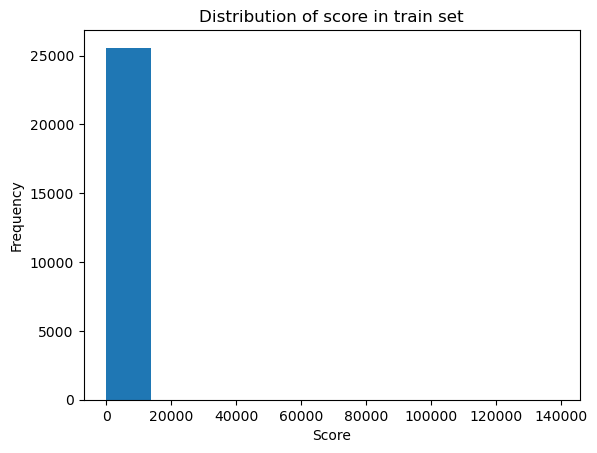

In [71]:

plt.hist(y_train)
plt.title('Distribution of score in train set')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [67]:
y_train.describe()

count     25585.000000
mean         92.439711
std        1263.534072
min           0.000000
25%           1.000000
50%           5.000000
75%          19.000000
max      138766.000000
Name: score, dtype: float64

In [62]:
y_train[y_train>20000]

24379     85113
23387     27245
22379     36204
20746     29425
23742     45696
22844     36299
23260    138766
23794     23891
21968     36698
Name: score, dtype: int64

In [66]:
print(X_train['selftext'][23260])

Buy more during dips if you can, but at least hold.

We just have to hold until they fold. Today's actions by several brokers just show how desperate the hedge funds are getting.

Hold with your immovable diamond hands for all that you hold dear and we will be breaking Wall Street **TOGETHER** while making gargantuan tendies in the end!

**WE LIKE THE STOCK.**

Comment with brokers that aren't corruptible and that we can move to fast!

**YOU CAN STILL BUY ON**  
**Fidelity** (10k instant deposit, accounts can be opened quickly)  
**Others:** Vanguard, Revolut, TastyWorks, Charles Schwab, TD Ameritrade, Webull, Degiro, Wells Fargo, M1, Public, etc.

*Edit*: It seems like TD Ameritrade, Webull, M1 Finance, and Public have removed their restrictions. Brokers are folding to the political support we are receiving.

[**http://isthesqueezesquoze.com/**](http://isthesqueezesquoze.com/)


In [69]:
print(X_train['selftext'][24379 ])

Hey everyone,

&#x200B;

We all just got screwed by Robinhood's screwup here. I'm friends with a lawyer who says we have a good case for a class action lawsuit.

&#x200B;

Everyone comment here if you have/had shares or calls in GME held in Robinhood at market open today.

&#x200B;

Let's show these guys the system can't fuck with us!

&#x200B;

Edit:

Everyone take screenshots of Robinhood's app saying you can't buy, or blocking your orders.

Edit the 2nd:

Wheeeew lads let's get on it! I'll go through all these pms and comments this afternoon with my lawyer friend. Keep em coming!

And please share!

Edit 3:

OMFG guys I'm getting 1000s of PMs! It'll take a while to sort through them all and reply, but keep messaging and sharing! Also if you were using WeBull or some other brokerage and got blocked, you might as well join too.

\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_